In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Car_sales.csv')
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [3]:
len(df.Manufacturer.unique())

30

In [4]:
len(df.Model.unique())

156

In [5]:
df.isnull().mean()*100

Manufacturer            0.000000
Model                   0.000000
Sales_in_thousands      0.000000
__year_resale_value    22.929936
Vehicle_type            0.000000
Price_in_thousands      1.273885
Engine_size             0.636943
Horsepower              0.636943
Wheelbase               0.636943
Width                   0.636943
Length                  0.636943
Curb_weight             1.273885
Fuel_capacity           0.636943
Fuel_efficiency         1.910828
Latest_Launch           0.000000
Power_perf_factor       1.273885
dtype: float64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().mean()*100

Manufacturer           0.0
Model                  0.0
Sales_in_thousands     0.0
__year_resale_value    0.0
Vehicle_type           0.0
Price_in_thousands     0.0
Engine_size            0.0
Horsepower             0.0
Wheelbase              0.0
Width                  0.0
Length                 0.0
Curb_weight            0.0
Fuel_capacity          0.0
Fuel_efficiency        0.0
Latest_Launch          0.0
Power_perf_factor      0.0
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 149
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         117 non-null    object 
 1   Model                117 non-null    object 
 2   Sales_in_thousands   117 non-null    float64
 3   __year_resale_value  117 non-null    float64
 4   Vehicle_type         117 non-null    object 
 5   Price_in_thousands   117 non-null    float64
 6   Engine_size          117 non-null    float64
 7   Horsepower           117 non-null    float64
 8   Wheelbase            117 non-null    float64
 9   Width                117 non-null    float64
 10  Length               117 non-null    float64
 11  Curb_weight          117 non-null    float64
 12  Fuel_capacity        117 non-null    float64
 13  Fuel_efficiency      117 non-null    float64
 14  Latest_Launch        117 non-null    object 
 15  Power_perf_factor    117 non-null    flo

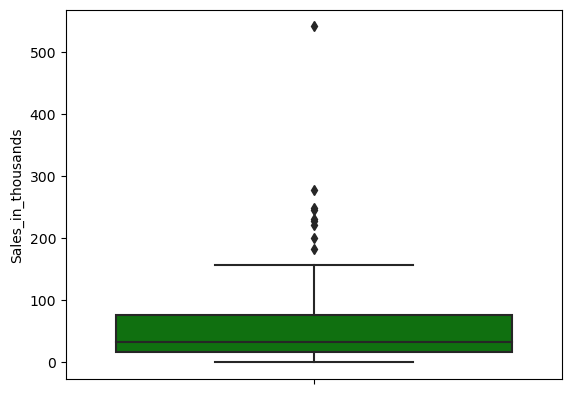

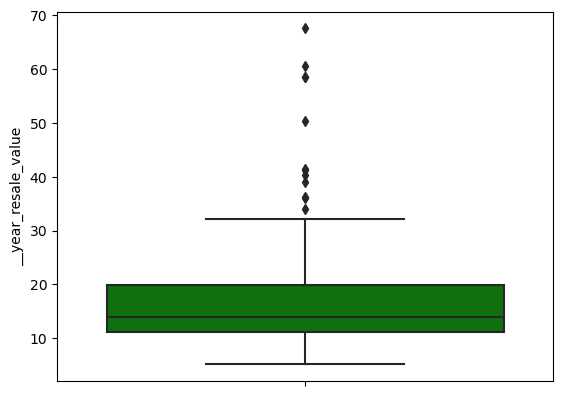

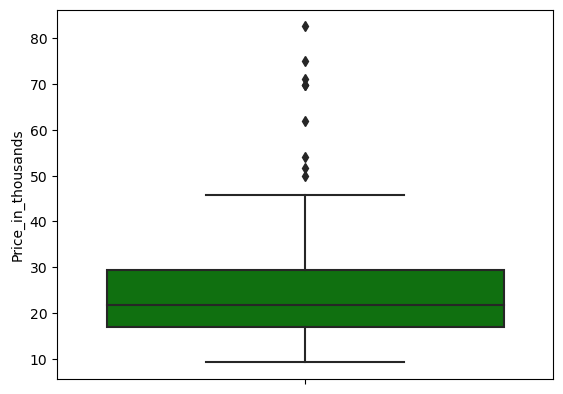

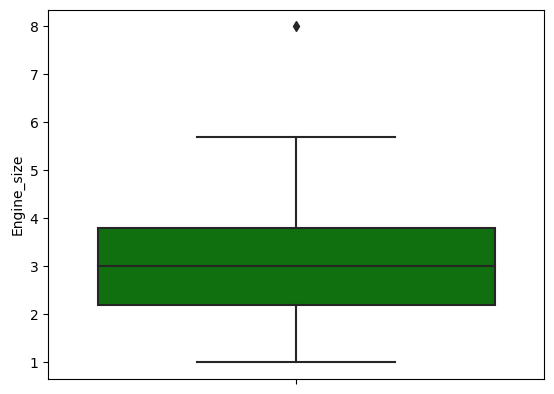

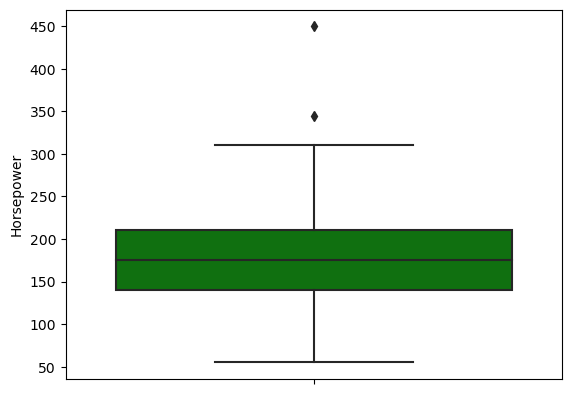

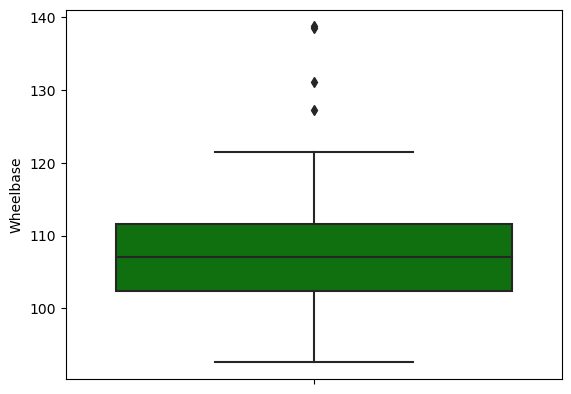

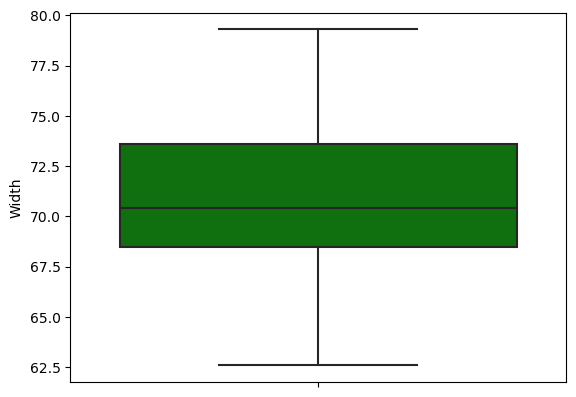

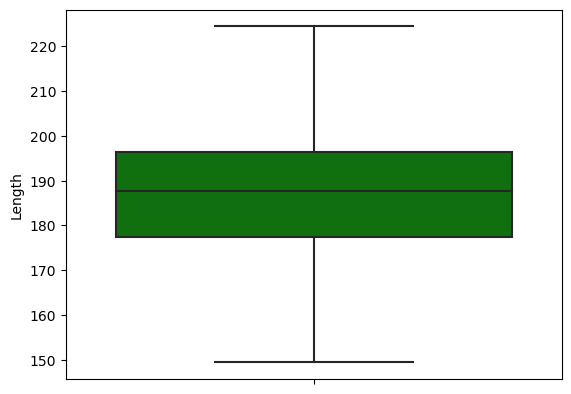

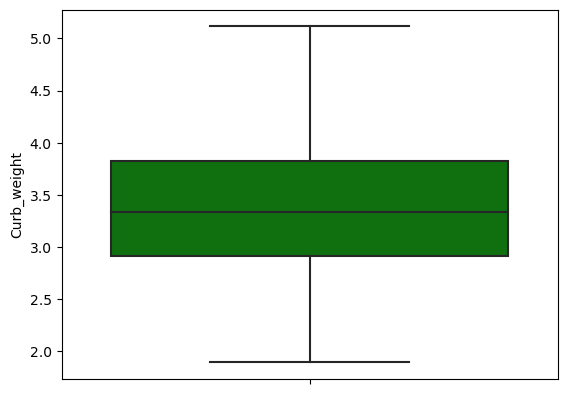

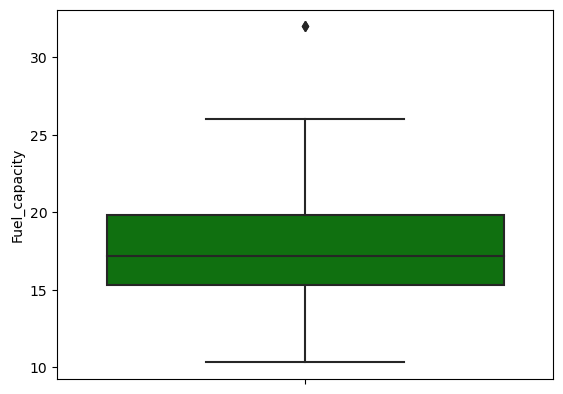

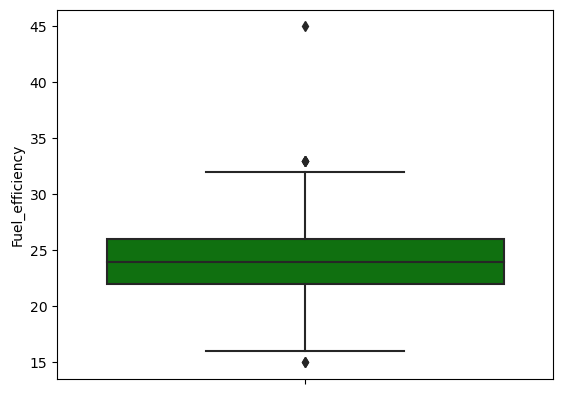

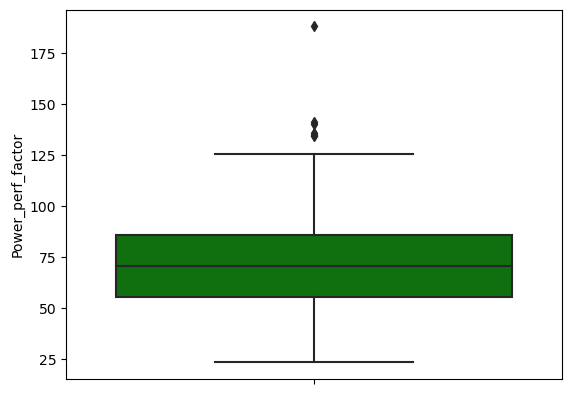

In [10]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(y=df[i], color="green")
        plt.show();

In [11]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL= Q1-1.5*Q1
    return UL, LL

In [13]:
for column in df.columns:
    if df[column].dtype !="object":
        UL,LL = outlier_limit(df[column])
        df[column] = np.where((df[column]>UL)|(df[column]<LL), np.nan, df[column])

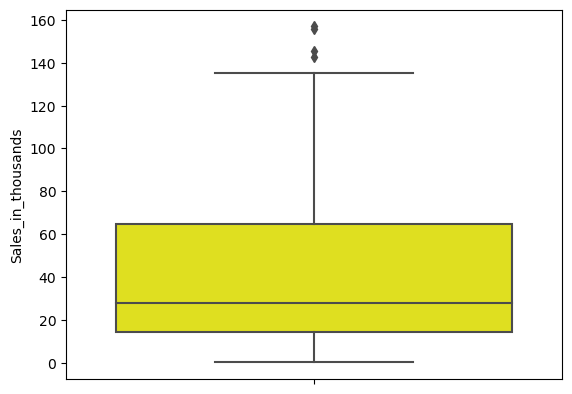

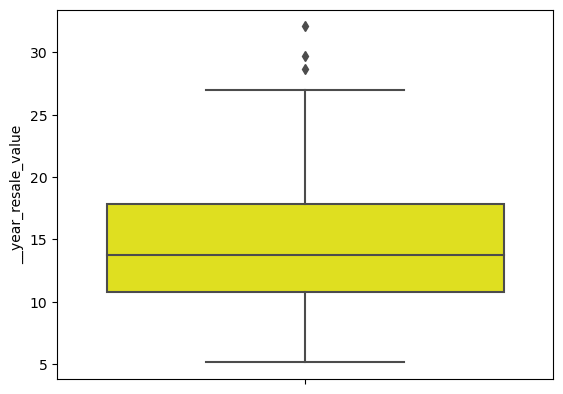

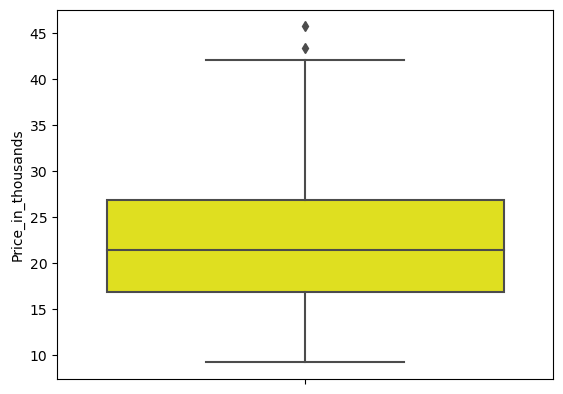

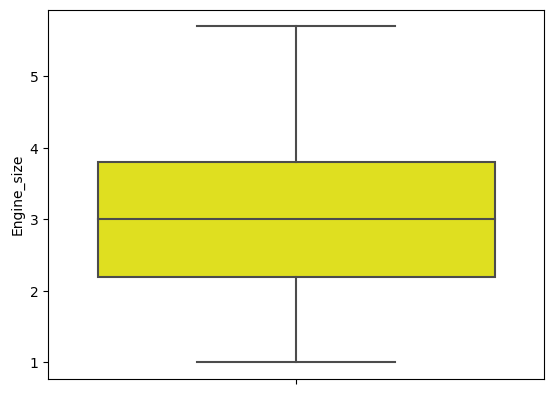

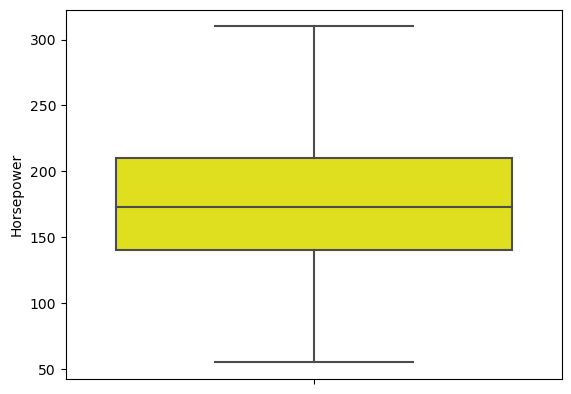

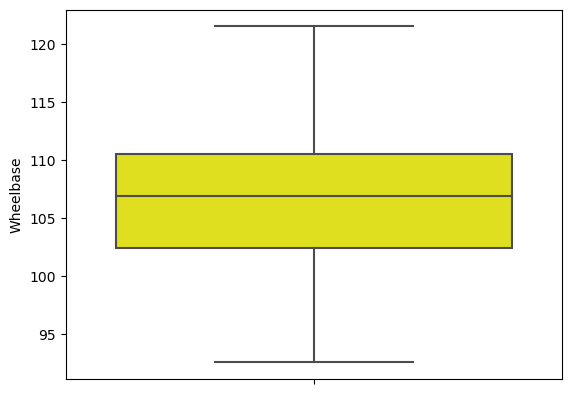

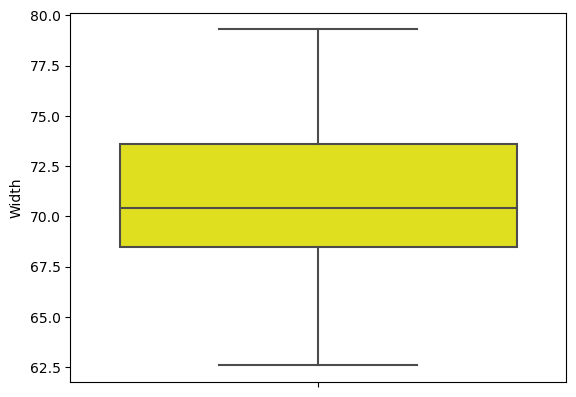

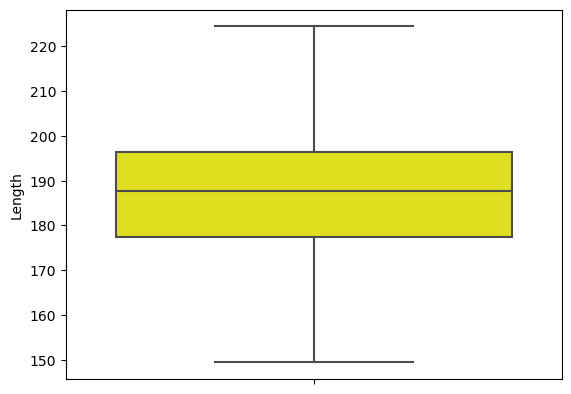

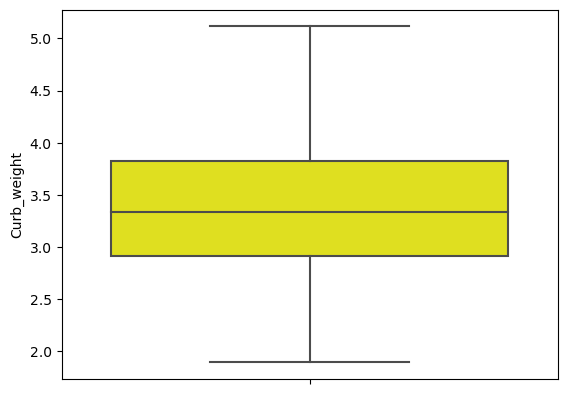

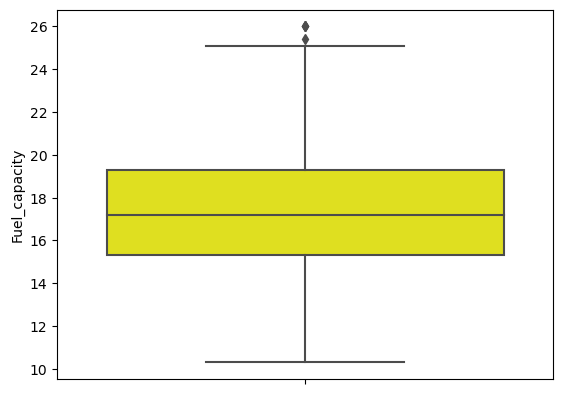

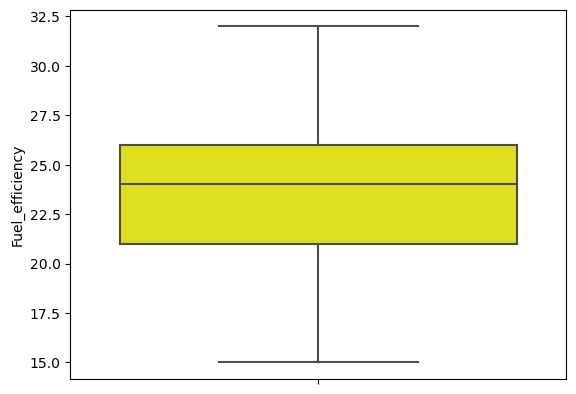

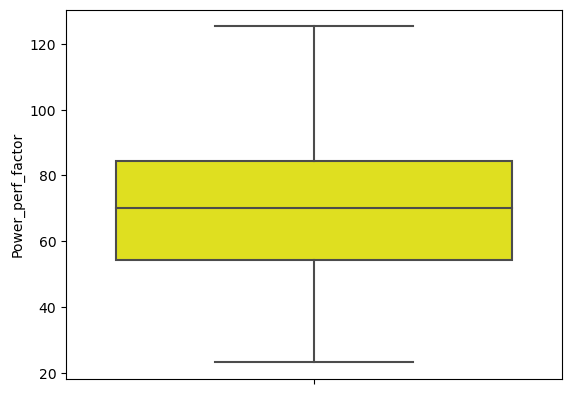

In [15]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(y=df[i], color="yellow")
        plt.show();

In [16]:
df.isnull().mean()*100

Manufacturer            0.000000
Model                   0.000000
Sales_in_thousands      7.692308
__year_resale_value    10.256410
Vehicle_type            0.000000
Price_in_thousands      7.692308
Engine_size             0.854701
Horsepower              1.709402
Wheelbase               3.418803
Width                   0.000000
Length                  0.000000
Curb_weight             0.000000
Fuel_capacity           1.709402
Fuel_efficiency         4.273504
Latest_Launch           0.000000
Power_perf_factor       5.128205
dtype: float64

In [17]:
df.dropna(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 149
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         88 non-null     object 
 1   Model                88 non-null     object 
 2   Sales_in_thousands   88 non-null     float64
 3   __year_resale_value  88 non-null     float64
 4   Vehicle_type         88 non-null     object 
 5   Price_in_thousands   88 non-null     float64
 6   Engine_size          88 non-null     float64
 7   Horsepower           88 non-null     float64
 8   Wheelbase            88 non-null     float64
 9   Width                88 non-null     float64
 10  Length               88 non-null     float64
 11  Curb_weight          88 non-null     float64
 12  Fuel_capacity        88 non-null     float64
 13  Fuel_efficiency      88 non-null     float64
 14  Latest_Launch        88 non-null     object 
 15  Power_perf_factor    88 non-null     floa

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le= LabelEncoder()

In [22]:
df["Le_Vehicle"] = le.fit_transform(df.Vehicle_type)

In [23]:
df.sample(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Le_Vehicle
51,Ford,Crown Victoria,63.403,14.210,Passenger,22.195,4.6,200.0,114.7,78.2,212.0,3.908,19.0,21.0,9/26/2011,80.499537,1
5,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105,1
23,Chevrolet,Camaro,26.402,13.025,Passenger,24.340,3.8,200.0,101.1,74.1,193.2,3.500,16.8,25.0,10/23/2011,81.118543,1
146,Volkswagen,Jetta,83.721,13.240,Passenger,16.700,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237,1
20,Chevrolet,Malibu,135.126,11.225,Passenger,16.535,3.1,170.0,107.0,69.4,190.4,3.051,15.0,25.0,3/19/2012,67.314462,1
84,Mitsubishi,Montero,11.337,19.125,Car,31.807,3.5,200.0,107.3,69.9,186.6,4.520,24.3,18.0,1/17/2012,83.920815,0
105,Nissan,Pathfinder,42.574,17.810,Car,29.299,3.3,170.0,106.3,71.7,182.6,3.947,21.0,19.0,9/25/2011,72.290355,0
138,Toyota,Avalon,63.849,18.140,Passenger,25.545,3.0,210.0,107.1,71.7,191.9,3.417,18.5,26.0,8/31/2011,84.911898,1
142,Toyota,RAV4,25.106,13.325,Car,16.888,2.0,127.0,94.9,66.7,163.8,2.668,15.3,27.0,5/6/2011,51.955109,0
11,Buick,Regal,39.350,13.740,Passenger,25.300,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,9/3/2011,95.636703,1


In [24]:
df['Le_Manufacturer'] = le.fit_transform(df.Manufacturer)
df.sample(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Le_Vehicle,Le_Manufacturer
131,Saturn,SW,5.223,10.790,Passenger,14.290,1.9,124.0,102.4,66.4,176.9,2.452,12.1,31.0,1/15/2011,49.865774,1,22
90,Mercury,Mountaineer,27.609,20.430,Car,27.560,4.0,210.0,111.6,70.2,190.1,3.876,21.0,18.0,2/13/2008,85.949744,0,16
115,Plymouth,Breeze,5.240,9.800,Passenger,16.080,2.0,132.0,108.0,71.0,186.3,2.942,16.0,27.0,11/14/2011,53.411898,1,20
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,1,1
111,Oldsmobile,Aurora,14.690,19.890,Passenger,36.229,4.0,250.0,113.8,74.4,205.4,3.967,18.5,22.0,2/18/2011,103.441693,1,19
32,Chrysler,LHS,13.462,17.325,Passenger,28.340,3.5,253.0,113.0,74.4,207.7,3.564,17.0,23.0,5/8/2012,101.329281,1,6
29,Chrysler,Sebring Conv.,32.775,14.180,Passenger,24.495,2.5,168.0,106.0,69.2,193.0,3.332,16.0,24.0,11/17/2011,69.521355,1,6
61,Honda,Odyssey,76.029,19.490,Car,26.000,3.5,210.0,118.1,75.6,201.2,4.288,20.0,23.0,2/8/2012,85.217691,0,9
108,Oldsmobile,Cutlass,1.112,11.240,Passenger,18.145,3.1,150.0,107.0,69.4,192.0,3.102,15.2,25.0,5/31/2011,60.861612,1,19
69,Jeep,Grand Cherokee,157.040,18.810,Car,26.895,4.0,195.0,105.9,72.3,181.5,3.880,20.5,19.0,12/10/2011,80.387779,0,12


In [25]:
df['Le_Model'] = le.fit_transform(df.Model)
df.sample(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Le_Vehicle,Le_Manufacturer,Le_Model
19,Chevrolet,Cavalier,145.519,9.250,Passenger,13.260,2.2,115.0,104.1,67.9,180.9,2.676,14.3,27.0,8/17/2011,46.363347,1,5,18
104,Nissan,Quest,27.308,15.380,Car,26.399,3.3,170.0,112.2,74.9,194.8,3.991,20.0,21.0,3/7/2011,71.171664,0,18,67
113,Oldsmobile,Silhouette,24.361,15.240,Car,25.345,3.4,185.0,120.0,72.2,201.4,3.948,25.0,22.0,6/25/2011,76.096570,0,19,76
92,Mercedes-B,C-Class,18.392,26.050,Passenger,31.750,2.3,185.0,105.9,67.7,177.4,3.250,16.4,26.0,4/24/2011,78.280731,1,15,13
13,Buick,LeSabre,83.257,13.360,Passenger,27.885,3.8,205.0,112.2,73.5,200.0,3.591,17.5,25.0,7/23/2011,84.254526,1,3,50
11,Buick,Regal,39.350,13.740,Passenger,25.300,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,9/3/2011,95.636703,1,3,70
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,1,0,69
138,Toyota,Avalon,63.849,18.140,Passenger,25.545,3.0,210.0,107.1,71.7,191.9,3.417,18.5,26.0,8/31/2011,84.911898,1,23,8
70,Lexus,ES300,24.072,26.975,Passenger,31.505,3.0,210.0,105.1,70.5,190.2,3.373,18.5,23.0,7/9/2012,87.211001,1,13,31
76,Lincoln,Continental,13.798,20.525,Passenger,39.080,4.6,275.0,109.0,73.6,208.5,3.868,20.0,22.0,8/3/2012,113.540207,1,14,24


In [26]:
df["Le_Latest_Launch"]=le.fit_transform(df.Latest_Launch)
df.sample(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Le_Vehicle,Le_Manufacturer,Le_Model,Le_Latest_Launch
120,Pontiac,Firebird,19.911,17.805,Passenger,25.310,3.8,200.0,101.1,74.5,193.4,3.492,16.8,25.0,6/16/2012,81.492726,1,21,37,54
143,Toyota,4Runner,68.411,19.425,Car,22.288,2.7,150.0,105.3,66.5,183.3,3.440,18.5,23.0,3/7/2011,62.355577,0,23,2,40
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,1,0,69,34
54,Ford,Expedition,125.338,23.575,Car,36.135,4.6,240.0,119.0,78.7,204.6,4.808,26.0,16.0,9/14/2012,100.024802,0,8,36,74
79,Mitsubishi,Mirage,26.232,8.325,Passenger,13.987,1.8,113.0,98.4,66.5,173.6,2.250,13.2,30.0,4/23/2012,45.832181,1,17,54,43
114,Plymouth,Neon,32.734,7.750,Passenger,12.640,2.0,132.0,105.0,74.4,174.4,2.559,12.5,29.0,4/26/2011,52.084899,1,20,61,45
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,1,0,47,30
48,Ford,Contour,35.068,8.835,Passenger,17.035,2.5,170.0,106.5,69.1,184.6,2.769,15.0,25.0,8/20/2012,67.351011,1,8,25,67
147,Volkswagen,Passat,51.102,16.725,Passenger,21.200,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381,1,24,64,10
101,Nissan,Sentra,42.643,8.450,Passenger,13.499,1.8,126.0,99.8,67.3,177.5,2.593,13.2,30.0,8/31/2011,50.241978,1,18,75,71


In [28]:
df1=df.drop(columns=['Manufacturer','Model','Vehicle_type','Latest_Launch'])
df1

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Le_Vehicle,Le_Manufacturer,Le_Model,Le_Latest_Launch
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,1,0,47,30
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,1,0,80,57
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,1,0,69,34
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,1,1,3,14
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,1,1,4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,9.761,11.425,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,46.943877,1,24,41,3
146,83.721,13.240,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,47.638237,1,24,48,68
147,51.102,16.725,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,61.701381,1,24,64,10
148,9.569,16.575,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,48.907372,1,24,15,50
